In [154]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from models import ols_regression, manhattan_linear, gc

In [155]:
def min_max_scaling(X,min_val,max_val):
    X = np.array(X)
    X_min = np.min(X)
    X_max = np.max(X)
    
    # If the column has constant values (min == max), return the original values unscaled
    if X_min == X_max:
        return X
    
    # Perform scaling if min != max
    X_scaled = (X - X_min) / (X_max - X_min) * (max_val - min_val) + min_val

    
    return X_scaled

In [156]:
nr_people_pop1 = 500
nr_people_pop2 = 10
nr_people_pop3 = 300
total_humans = nr_people_pop1+ nr_people_pop2+nr_people_pop3
minaf_pop1 = 0.6
minaf_pop2 = 0.6
minaf_pop3 = 0.6

majaf_pop1 = 0.2
majaf_pop2 = 0.1
majaf_pop3 = 0.1

hetaf_pop1 = 1 - minaf_pop1 - majaf_pop1
hetaf_pop2 = 1 - minaf_pop2 - majaf_pop2
hetaf_pop3 = 1 - minaf_pop3 - majaf_pop3

pheno_pop1 = 0.3
pheno_pop2 = 0.7
pheno_pop3 = 0.1

In [157]:
# make snp
pop1_snps = [-1]*int(nr_people_pop1*minaf_pop1) + [0]*int(nr_people_pop1*hetaf_pop1) + [1]*int(nr_people_pop1*majaf_pop1)
pop2_snps = [-1]*int(nr_people_pop2*minaf_pop2) + [0]*int(nr_people_pop2*hetaf_pop2) + [1]*int(nr_people_pop2*majaf_pop2)
pop3_snps = [-1]*int(nr_people_pop3*minaf_pop3) + [0]*int(nr_people_pop3*hetaf_pop3) + [1]*int(nr_people_pop3*majaf_pop3)
nr_pop1_snps = [int(nr_people_pop1*minaf_pop1)]*int(nr_people_pop1*minaf_pop1) + [int(nr_people_pop1*hetaf_pop1)]*int(nr_people_pop1*hetaf_pop1) + [int(nr_people_pop1*majaf_pop1)]*int(nr_people_pop1*majaf_pop1)
nr_pop2_snps = [int(nr_people_pop2*minaf_pop2)]*int(nr_people_pop2*minaf_pop2) + [int(nr_people_pop2*hetaf_pop2)]*int(nr_people_pop2*hetaf_pop2) + [int(nr_people_pop2*majaf_pop2)]*int(nr_people_pop2*majaf_pop2)
nr_pop3_snps = [int(nr_people_pop3*minaf_pop3)]*int(nr_people_pop3*minaf_pop3) + [int(nr_people_pop3*hetaf_pop3)]*int(nr_people_pop3*hetaf_pop3) + [int(nr_people_pop3*majaf_pop3)]*int(nr_people_pop3*majaf_pop3)

snps = pop1_snps + pop2_snps + pop3_snps
snps_nr = nr_pop1_snps + nr_pop2_snps + nr_pop3_snps


In [158]:
minaf = [minaf_pop1]*nr_people_pop1 + [minaf_pop2]*nr_people_pop2 + [minaf_pop3]*nr_people_pop3
hetaf = [hetaf_pop1]*nr_people_pop1 + [hetaf_pop2]*nr_people_pop2 + [hetaf_pop3]*nr_people_pop3
majaf = [majaf_pop1]*nr_people_pop1 + [majaf_pop2]*nr_people_pop2 + [majaf_pop3]*nr_people_pop3

In [159]:
pop = ['pop1']*nr_people_pop1 + ['pop2']*nr_people_pop2 +  ['pop3']*nr_people_pop3
pop_nr = [nr_people_pop1]*nr_people_pop1 + [nr_people_pop2]*nr_people_pop2 +  [nr_people_pop3]*nr_people_pop3
risk = [pheno_pop1]*nr_people_pop1 + [pheno_pop2]*nr_people_pop2 +  [pheno_pop3]*nr_people_pop3

In [160]:
humans = pd.DataFrame()
humans['snp'] = snps
humans = pd.get_dummies(humans, columns=['snp'], dtype=int)
humans['snp'] = snps
humans['snp_nr'] = snps_nr
humans['snp_nr'] = humans['snp_nr']/humans['snp_nr'].max()

humans['minaf'] = minaf
humans['hetaf'] = hetaf
humans['majaf'] = majaf
humans['pop'] = pop
humans['pop_quantity'] = pop_nr
humans['risk'] = risk
#humans['risk'] = min_max_scaling(humans['risk'],-1,1)
#humans['risk'] = (humans['risk'] - humans['risk'].mean()) / humans['risk'].std()

In [161]:
count_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)
total_minor = count_total_AFs.loc[-1].snp
total_het = count_total_AFs.loc[0].snp
total_major = count_total_AFs.loc[1].snp

In [162]:
humans['snp'] = humans['snp']-humans['snp'].mean()

In [163]:
humans

,snp_-1,snp_0,snp_1,snp,snp_nr,minaf,hetaf,majaf,pop,pop_quantity,risk
0,1,0,0,-0.561728,1.0,0.6,0.2,0.2,pop1,500,0.3
1,1,0,0,-0.561728,1.0,0.6,0.2,0.2,pop1,500,0.3
2,1,0,0,-0.561728,1.0,0.6,0.2,0.2,pop1,500,0.3
3,1,0,0,-0.561728,1.0,0.6,0.2,0.2,pop1,500,0.3
4,1,0,0,-0.561728,1.0,0.6,0.2,0.2,pop1,500,0.3
...,...,...,...,...,...,...,...,...,...,...,...
805,0,0,1,1.438272,0.1,0.6,0.3,0.1,pop3,300,0.1
806,0,0,1,1.438272,0.1,0.6,0.3,0.1,pop3,300,0.1
807,0,0,1,1.438272,0.1,0.6,0.3,0.1,pop3,300,0.1
808,0,0,1,1.438272,0.1,0.6,0.3,0.1,pop3,300,0.1


In [164]:
pheno_pop1 = humans[humans['pop']=='pop1']['risk'].mean()
pheno_pop2 = humans[humans['pop']=='pop2']['risk'].mean()
pheno_pop3 = humans[humans['pop']=='pop3']['risk'].mean()

In [165]:
humans['risk'] = humans['risk']-humans['risk'].mean()

In [166]:
X = humans[['snp']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

0.007491739019920005


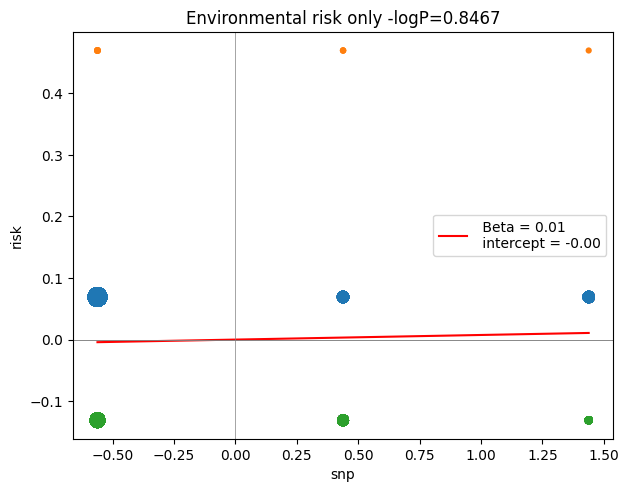

In [167]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# correction

In [168]:
humans['corr'] = humans['snp_-1']*humans['minaf'] + humans['snp_1']*humans['majaf'] + humans['snp_0']*humans['hetaf'] 

In [169]:
humans['corr'] = humans['snp']/humans['corr']

In [170]:
# calibrating
X = humans[['corr']]  # Predictor variable
y = humans['snp']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['corr']
humans['corr'] = humans['corr'] = humans['corr']*beta

In [171]:
X = humans[['corr']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['corr']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['corr']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

-6.331740687315346e-17


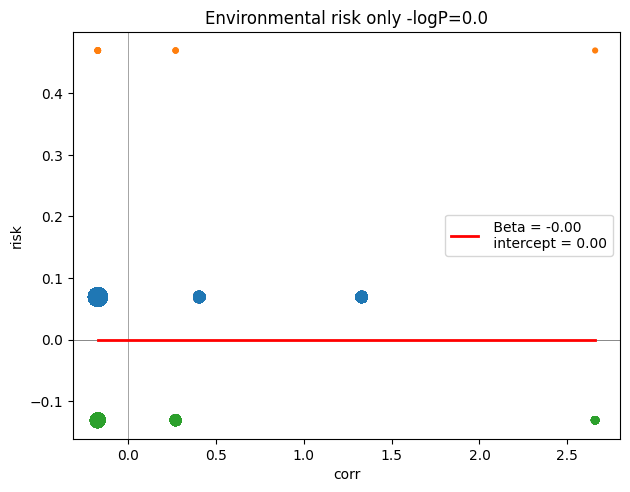

In [172]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='corr', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['corr'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}', linewidth=2)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [176]:
# make snp
pop1_snps = [-1]*int(nr_people_pop1*minaf_pop1) + [0]*int(nr_people_pop1*hetaf_pop1) + [1]*int(nr_people_pop1*majaf_pop1)
pop2_snps = [-1]*int(nr_people_pop2*minaf_pop2) + [0]*int(nr_people_pop2*hetaf_pop2) + [1]*int(nr_people_pop2*majaf_pop2)
pop3_snps = [-1]*int(nr_people_pop3*minaf_pop3) + [0]*int(nr_people_pop3*hetaf_pop3) + [1]*int(nr_people_pop3*majaf_pop3)
nr_pop1_snps = [int(nr_people_pop1*minaf_pop1)]*int(nr_people_pop1*minaf_pop1) + [int(nr_people_pop1*hetaf_pop1)]*int(nr_people_pop1*hetaf_pop1) + [int(nr_people_pop1*majaf_pop1)]*int(nr_people_pop1*majaf_pop1)
nr_pop2_snps = [int(nr_people_pop2*minaf_pop2)]*int(nr_people_pop2*minaf_pop2) + [int(nr_people_pop2*hetaf_pop2)]*int(nr_people_pop2*hetaf_pop2) + [int(nr_people_pop2*majaf_pop2)]*int(nr_people_pop2*majaf_pop2)
nr_pop3_snps = [int(nr_people_pop3*minaf_pop3)]*int(nr_people_pop3*minaf_pop3) + [int(nr_people_pop3*hetaf_pop3)]*int(nr_people_pop3*hetaf_pop3) + [int(nr_people_pop3*majaf_pop3)]*int(nr_people_pop3*majaf_pop3)

snps = pop1_snps + pop2_snps + pop3_snps
snps_nr = nr_pop1_snps + nr_pop2_snps + nr_pop3_snps
humans['snp'] = snps


In [177]:
humans

,snp_-1,snp_0,snp_1,snp,snp_nr,minaf,hetaf,majaf,pop,pop_quantity,risk,predicted_risk,corr
0,1,0,0,-1,1.0,0.6,0.2,0.2,pop1,500,0.069136,6.939639e-17,-0.173063
1,1,0,0,-1,1.0,0.6,0.2,0.2,pop1,500,0.069136,6.939639e-17,-0.173063
2,1,0,0,-1,1.0,0.6,0.2,0.2,pop1,500,0.069136,6.939639e-17,-0.173063
3,1,0,0,-1,1.0,0.6,0.2,0.2,pop1,500,0.069136,6.939639e-17,-0.173063
4,1,0,0,-1,1.0,0.6,0.2,0.2,pop1,500,0.069136,6.939639e-17,-0.173063
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,0,1,1,0.1,0.6,0.3,0.1,pop3,300,-0.130864,-1.099036e-16,2.658702
806,0,0,1,1,0.1,0.6,0.3,0.1,pop3,300,-0.130864,-1.099036e-16,2.658702
807,0,0,1,1,0.1,0.6,0.3,0.1,pop3,300,-0.130864,-1.099036e-16,2.658702
808,0,0,1,1,0.1,0.6,0.3,0.1,pop3,300,-0.130864,-1.099036e-16,2.658702


In [178]:
X = humans[['snp']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

0.007491739019920004


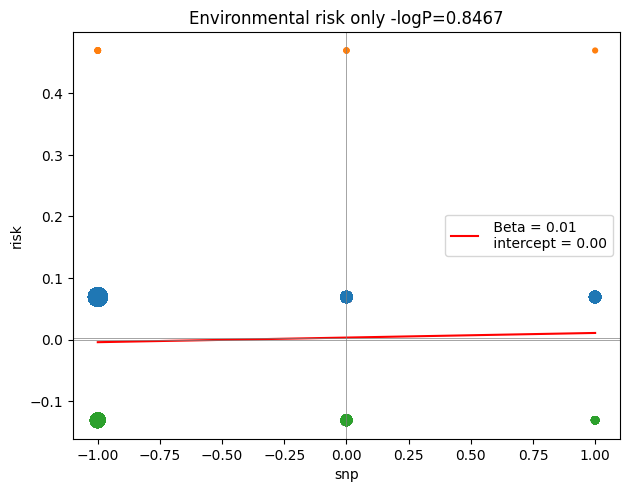

In [179]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()